In [97]:
from multiclass_functions1 import * # my module import
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


In [98]:
BATCH_SIZE = 32
LR = 1e-2
EPOCH = 100
criterion = nn.MSELoss() # MSE loss 사용
# loss = nn.MSELoss()(y_hat, y)
new_model_train = True
# save_model_path = model save path

In [99]:
def Test(model,X_test,Y_test):
    model.eval()
    with torch.no_grad():
        X_test = X_test.to(DEVICE)
        Y_test = Y_test.to(DEVICE)
        # inference
        y_hat = model(X_test)
        # loss
        loss = F.mse_loss(y_hat, Y_test)
        # loss = criterion(y_hat, Y_test) # 가능

    # test result visualization
    plt.plot(X_test,Y_test,'b:',label="true_curve")
    plt.plot(X_test,y_hat,'r',label="test")
    plt.xlabel("x",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.grid()
    plt.legend(fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig('image/test_test.png')
    print(f"Test loss: {loss.item()}")

# Dataset
class Custom_Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        x = self.X[idx]
        if self.transform:
            x = self.transform(x)
        y = self.Y[idx]
        return x, y

In [100]:
# Fully-connected layers
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1
        self.fcs = nn.Sequential(nn.Linear(1, 3),
                                 nn.ReLU(), # RELU로 한다
                                 nn.Linear(3, 1))

    def forward(self,x):
        x = torch.flatten(x, start_dim=1) # 평평하게 피는 것
        # torch.flatten(data, start_dim, end_dim) > start_dim~end_dim까지 차원 펴주기
        # start_dim=1;
        x = self.fcs(x)
        return x

In [101]:
X=torch.linspace(-10,10,1000).reshape(-1,1)
# X.shape = ([1000,1])
Y=X**2 # -10~10까지 학습
X_test=torch.linspace(-15,15,1000).reshape(-1,1) # 테스트는 -15에서 15까지!
# -10~10까지는 잘 될것이고, -15부터 15까지는 잘 테스트를 못할 것
Y_test=X_test**2

In [102]:
train_DS = Custom_Dataset(X, Y)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)
# 32개씩 섞어서

In [103]:
model=MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
# batch size 단위로 데이터 출력
print(model(x_batch.to(DEVICE)).shape) # 예측값 : 32개씩 1개의 채널 데이터

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=1, bias=True)
  )
)
torch.Size([32, 1])


Epoch: 1 train loss: 1771.243
--------------------
Epoch: 2 train loss: 293.065
--------------------
Epoch: 3 train loss: 172.0
--------------------
Epoch: 4 train loss: 120.79
--------------------
Epoch: 5 train loss: 77.825
--------------------
Epoch: 6 train loss: 41.235
--------------------
Epoch: 7 train loss: 22.868
--------------------
Epoch: 8 train loss: 15.032
--------------------
Epoch: 9 train loss: 12.716
--------------------
Epoch: 10 train loss: 12.061
--------------------
Epoch: 11 train loss: 9.461
--------------------
Epoch: 12 train loss: 8.242
--------------------
Epoch: 13 train loss: 4.11
--------------------
Epoch: 14 train loss: 2.497
--------------------
Epoch: 15 train loss: 2.744
--------------------
Epoch: 16 train loss: 1.062
--------------------
Epoch: 17 train loss: 1.028
--------------------
Epoch: 18 train loss: 1.03
--------------------
Epoch: 19 train loss: 0.708
--------------------
Epoch: 20 train loss: 0.55
--------------------
Epoch: 21 train loss

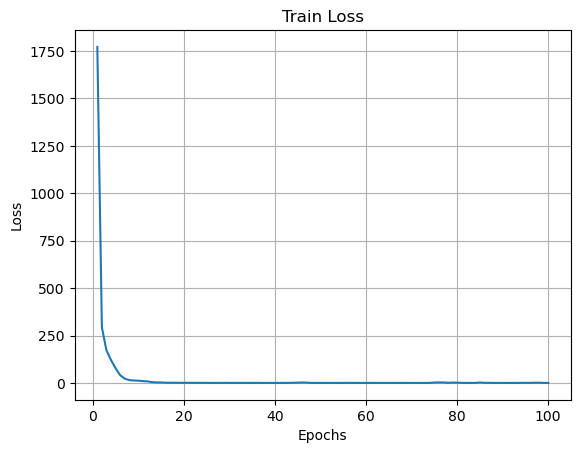

In [104]:
if new_model_train: # model train 여부 따라
    optimizer = optim.Adam(model.parameters(), lr = LR)
    loss_history = Train(model, train_DL, criterion, optimizer, LR=LR, EPOCH=EPOCH)

    # torch.save(model, save_model_path)

    plt.figure()
    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train Loss")
    plt.grid()
    plt.savefig('image/test.png')

Test loss: 100.26212310791016


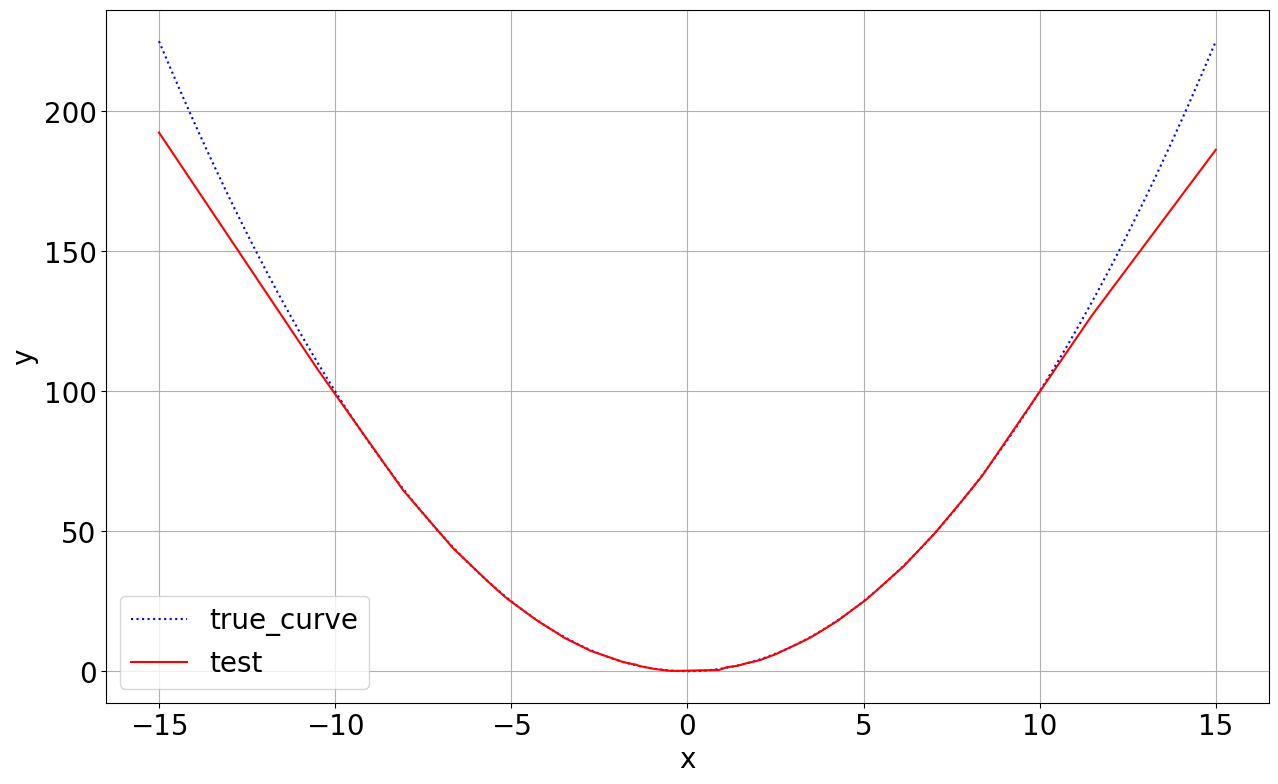

In [105]:
# load_model = torch.load(save_model_path, map_location=DEVICE)

plt.figure(figsize=[15,9])
# Test(load_model, X_test, Y_test)
Test(model, X_test, Y_test)
# print(count_params(load_model))

파란색이 실제 정답값 !
- 빨간색이 예측값

In [106]:
# 보여드린 증명 방식대로 훈련되는 것은 아니라는 것 확인!
print(model.fcs[0].weight)
print(model.fcs[0].bias)
print(model.fcs[2].weight)
print(model.fcs[2].bias)

Parameter containing:
tensor([[-0.3197],
        [-0.5370],
        [-0.5232],
        [-0.0166],
        [ 1.2480],
        [-0.8258],
        [ 0.4327],
        [-1.0727],
        [ 0.2258],
        [ 0.1848]], requires_grad=True)
Parameter containing:
tensor([ 0.1381, -0.1398,  0.8862, -1.1444, -0.4388, -2.2861, -1.5185, -1.4790,
         0.2471, -1.5461], requires_grad=True)
Parameter containing:
tensor([[ 0.0609, -0.3192,  0.0079,  0.1241,  0.0129, -0.2667, -0.3614, -0.1790,
         -0.0504, -0.1221],
        [ 0.1177,  0.3622,  0.3957, -0.2175,  0.0394, -0.0729, -0.0426,  0.1656,
          0.0558,  0.2230],
        [ 0.0931,  0.2002, -0.3965,  0.0916,  0.4479,  0.8782,  0.4332,  0.4759,
          0.2055,  0.6288],
        [-0.1904, -0.3124, -0.1313,  0.1940, -0.1699, -0.1070, -0.2161,  0.0098,
         -0.0084,  0.3125],
        [-0.0056, -0.0311, -0.0249, -0.2307, -0.0730, -0.1385, -0.5435, -0.1217,
         -0.0254, -0.4070],
        [ 0.0727, -0.2755, -0.2823, -0.0874, -0.271

증명방식은 네모낳게 여러개가 쌓여있는 것이었는데, 실제로는 아니라는 것을 확인!

## Case 비교

In [107]:
# Fully-connected layers
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        ### 요기 부분

    def forward(self,x):
        x = torch.flatten(x, start_dim=1) # 평평하게 피는 것
        # torch.flatten(data, start_dim, end_dim) > start_dim~end_dim까지 차원 펴주기
        # start_dim=1;
        x = self.fcs(x)
        return x

### case 1

In [ ]:
# case 1: hidden layer 하나여도 괜찮게 된다! (심지어 노드 3개)
self.fcs = nn.Sequential(nn.Linear(1, 3),
                          nn.ReLU(), # RELU로 한다
                          nn.Linear(3, 1))

<img src="image/case1.png" width="300">
<img src="image/case1_test.png" width="350">

### case 2

In [ ]:
# case 2: 물론 노드를 늘리면 더 잘한다
self.fcs = nn.Sequential(nn.Linear(1, 10),
                          nn.ReLU(),
                          nn.Linear(10, 1))

<img src="image/case2.png" width="300">
<img src="image/case2_test.png" width="350">

### case 3

In [ ]:
 # case 3: 늘릴수록 좀더 부드러워짐
self.fcs = nn.Sequential(nn.Linear(1, 100),
                          nn.ReLU(),
                          nn.Linear(100, 1))

<img src="image/case3.png" width="300">
<img src="image/case3_test.png" width="350">

### case 4

In [ ]:
# case 4: 천개로 늘리면..? 잘되지만 안보여준 data에 대해선 여전히 잘 못함 (overfitting)
self.fcs = nn.Sequential(nn.Linear(1, 1000),
                          nn.ReLU(),
                          nn.Linear(1000, 1))

<img src="image/case4.png" width="300">
<img src="image/case4_test.png" width="350">

### case 5

In [ ]:
# case 5: 깊이를 늘려도 노드 수가 너무 적으면 안된다 > 오히려 한개층&노드가 3개일때가 더 낫다
self.fcs = nn.Sequential(nn.Linear(1, 3),
                          nn.ReLU(),
                          nn.Linear(3, 3),
                          nn.ReLU(),
                          nn.Linear(3, 3),
                          nn.ReLU(),
                          nn.Linear(3, 3),
                          nn.ReLU(),
                          nn.Linear(3, 3),
                          nn.ReLU(),
                          nn.Linear(3, 1))

<img src="image/case5.png" width="300">
<img src="image/case5_test.png" width="350">

## case 6

In [ ]:
# case 6-1: 노드 수를 적당히 키우고 깊이를 늘림 (부드럽다!)
self.fcs = nn.Sequential(nn.Linear(1, 10),
                          nn.ReLU(),
                          nn.Linear(10, 10),
                          nn.ReLU(),
                          nn.Linear(10, 10),
                          nn.ReLU(),
                          nn.Linear(10, 10),
                          nn.ReLU(),
                          nn.Linear(10, 10),
                          nn.ReLU(),
                          nn.Linear(10, 1))

<img src="image/case6.png" width="300">
<img src="image/case6_test.png" width="350">

case 1과 case 6 비교
- => 노드가 많으면 좀더 사이사이가 좁아져서 디테일을 잘 표현 > 네모가 좁게 좁게 채워주는 느낌
- 깊이가 깊으면 nonlinearity가 좀더 커진다고 해석 가능 > 각각의 곡선이 부드러워진다 > non-linear해진다?

<img src="image/case1_test.png" width="500">
<img src="image/case6_test.png" width="500">